# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings('ignore')
# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library for data processing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# library for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold

# library for model evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
pd.set_option("display.max_columns",None) # setting to display all the columns
print("Dataset's shape", df.shape) #shows dimensionality of the dataframe, and shows the number of rows and columns

Dataset's shape (5110, 12)


In [7]:
print('Total rows: ', df.shape[0])
print('Total columns: ', df.shape[1])

Total rows:  5110
Total columns:  12


In [8]:
print(df.columns) #name of the columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [9]:
df.dtypes #data types of each columns

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.ndim #dimension

2

In [11]:
df.size #total element

61320

In [12]:
print(df.info()) #shows number of non-null value and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [13]:
df.describe() # basic statistical infos per feature of the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Drop duplicate

In [14]:
df.drop_duplicates() # it counts the number of duplicate(doest not drop the duplictae)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


No duplicates

# Replacing null values with mean

In [15]:
df.isnull().sum() #counts number of null values of each features

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
df=df.fillna(value=df['bmi'].mean())

In [17]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


([<matplotlib.patches.Wedge at 0x1e7777b8d00>,
 [Text(0.3354698287660306, -2.1742722906728336, 'Not Stroke'),
  Text(-0.33546985421228903, 2.174272286746714, 'Stroke')],
 [Text(0.2439780572843859, -1.5812889386711517, '95.1%'),
  Text(-0.24397807579075567, 1.5812889358157922, '4.9%')])

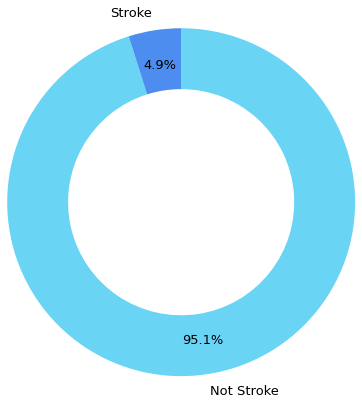

In [18]:
stroke_count=df['stroke'].value_counts()
plt.pie(stroke_count,labels=['Not Stroke','Stroke'],startangle=90,counterclock=False,wedgeprops = {'width' : 0.7},radius=2,autopct='%.1f%%',
        pctdistance=0.8,colors=['#6AD4F5','#4C8DEF'],textprops={'fontsize': 13})

# Scatter Plot with and without hue

In [19]:
from matplotlib import pyplot as plt
plt.rc('figure',max_open_warning = 0) # avoid showing warning while plotting 2D plots

Text(0.5, 1.0, 'Scatter Plot of Age against Stroke')

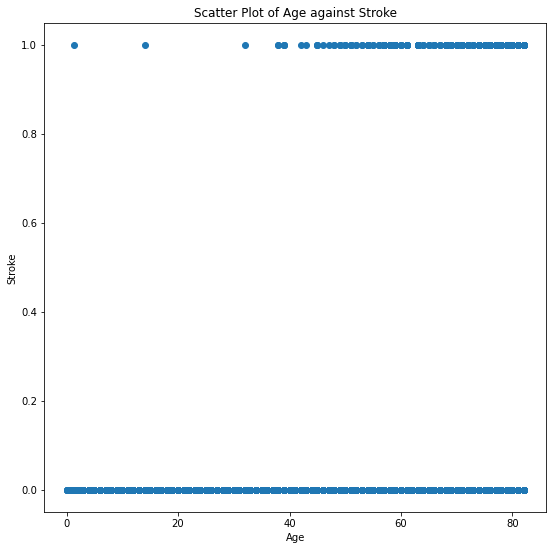

In [20]:
plt.figure(figsize =(9,9))
plt.scatter(x = 'age', y = 'stroke', data = df) 
plt.xlabel('Age')
plt.ylabel('Stroke')
plt.title('Scatter Plot of Age against Stroke')

<AxesSubplot:xlabel='age', ylabel='stroke'>

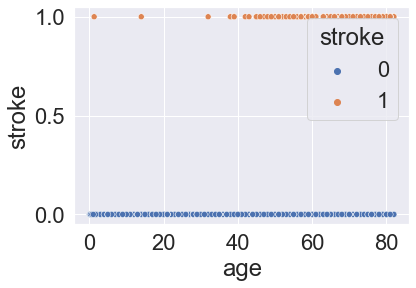

In [21]:
sns.set(font_scale=2)
sns.scatterplot(x = 'age', y = 'stroke' , hue = 'stroke', data = df)

# KDE plot with and without hue

<AxesSubplot:xlabel='stroke', ylabel='Density'>

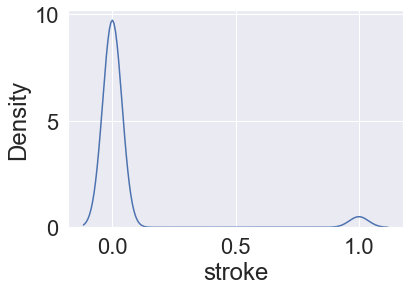

In [22]:
sns.kdeplot(x = 'stroke', data = df)

<AxesSubplot:xlabel='age', ylabel='Density'>

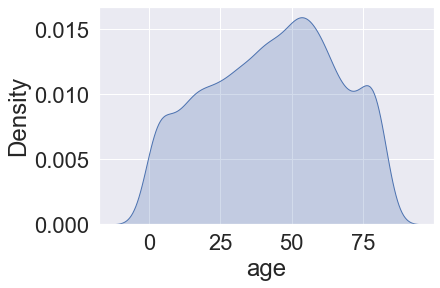

In [23]:
sns.kdeplot(x = 'age', data = df, shade = True)

<AxesSubplot:xlabel='age', ylabel='Density'>

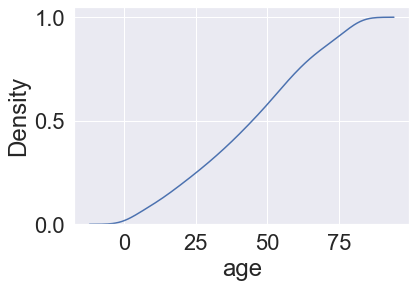

In [24]:
sns.kdeplot(x = 'age', data = df, cumulative = True)

<AxesSubplot:xlabel='age', ylabel='Density'>

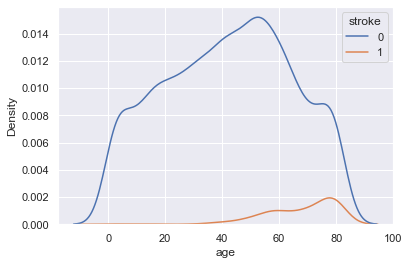

In [25]:
sns.set(font_scale=1)
sns.kdeplot(x = 'age', data = df, hue = 'stroke')

<AxesSubplot:xlabel='age', ylabel='Density'>

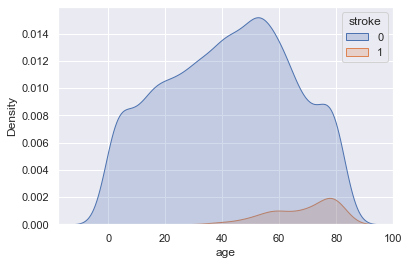

In [26]:
sns.set(font_scale=1)
sns.kdeplot(x = 'age', data = df, hue = 'stroke', shade = True)

# Histogram with and without hue

<AxesSubplot:xlabel='stroke', ylabel='Count'>

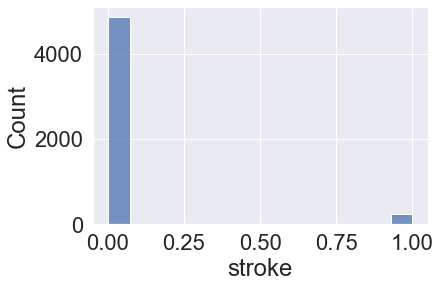

In [27]:
sns.set(font_scale=2)
sns.histplot(x = 'stroke', data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

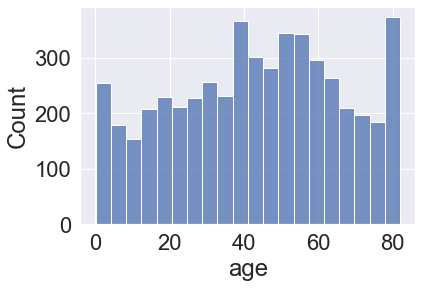

In [28]:
sns.set(font_scale=2)
sns.histplot(x = 'age', data = df)

<AxesSubplot:xlabel='age', ylabel='Count'>

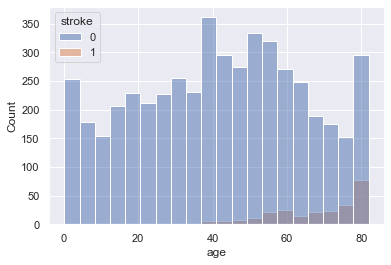

In [29]:
sns.set(font_scale=1)
sns.histplot(x = 'age', hue = 'stroke', data = df)

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

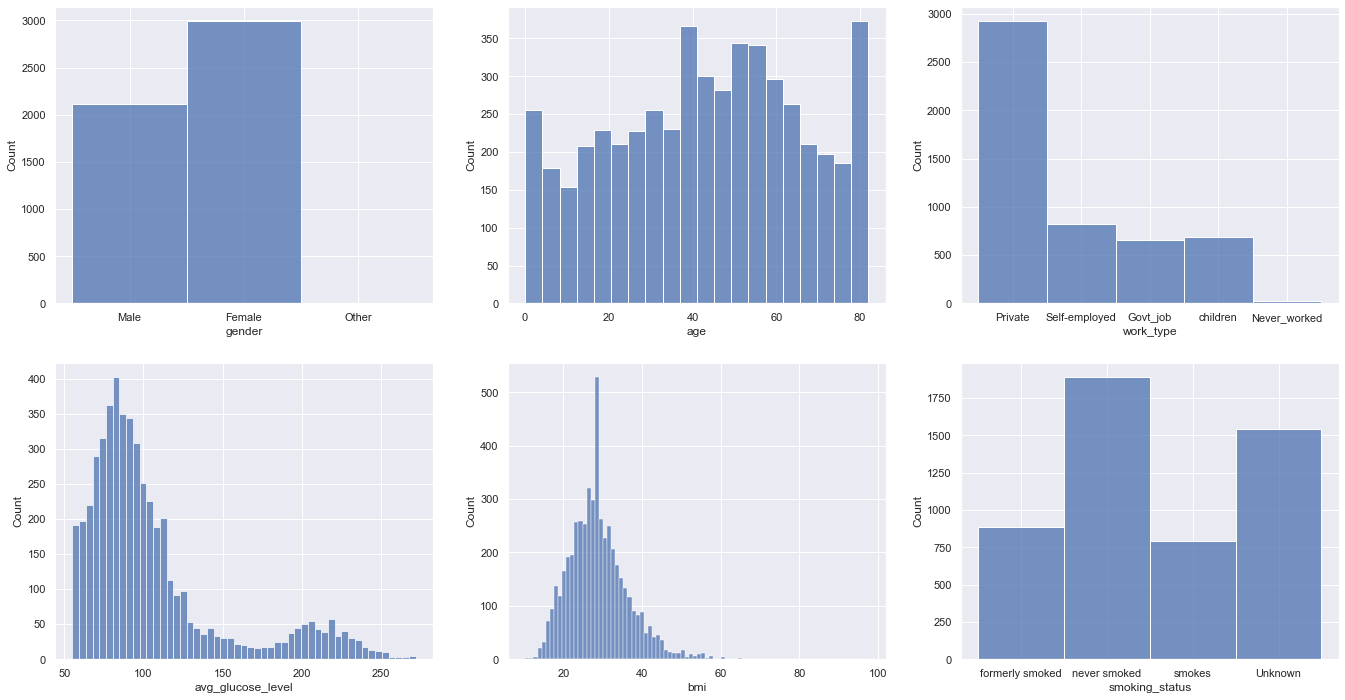

In [30]:
fig, axs = plt.subplots(2, 3,figsize=(23,12))
sns.histplot(df['gender'],kde=False,ax=axs[0,0])
sns.histplot(df['age'],kde=False,ax=axs[0,1])
sns.histplot(df['work_type'],kde=False,ax=axs[0,2])
sns.histplot(df['avg_glucose_level'],kde=False,ax=axs[1,0])
sns.histplot(df['bmi'],kde=False,ax=axs[1,1])
sns.histplot(df['smoking_status'],kde=False,ax=axs[1,2])

# Boxplot

<AxesSubplot:xlabel='stroke'>

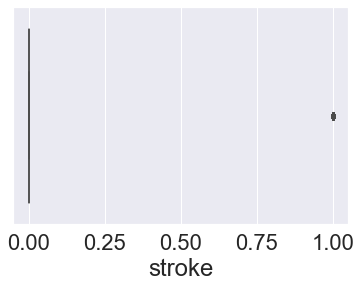

In [31]:
sns.set(font_scale=2)
sns.boxplot(x = 'stroke', data = df)

<AxesSubplot:xlabel='age'>

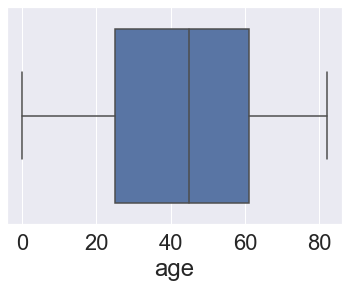

In [32]:
sns.set(font_scale=2)
sns.boxplot(x = 'age', data = df)

<AxesSubplot:xlabel='bmi'>

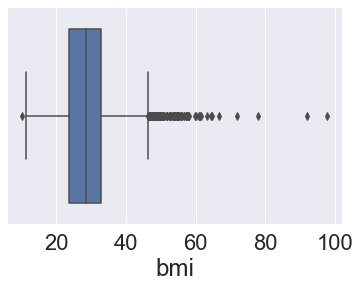

In [33]:
sns.set(font_scale=2)
sns.boxplot(x = 'bmi', data = df)

# One-Hot Encoding

In [34]:
# onehot encoding for categorical feature
df = pd.get_dummies(df)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0


# SMOTE

In [35]:
# separate feature and target
X = df.drop(columns = ['stroke'])
y = df['stroke']

In [36]:

# using SMOTE Techniqe
sm = SMOTE(random_state=111)
X_sm , y_sm = sm.fit_resample(X,y)

print(f'''Shape of X before SMOTE:{X.shape}
Shape of X after SMOTE:{X_sm.shape}''',"\n\n")

print(f'''Target Class distributuion before SMOTE:\n{y.value_counts(normalize=True)}
Target Class distributuion after SMOTE :\n{y_sm.value_counts(normalize=True)}''')

Shape of X before SMOTE:(5110, 22)
Shape of X after SMOTE:(9722, 22) 


Target Class distributuion before SMOTE:
0    0.951272
1    0.048728
Name: stroke, dtype: float64
Target Class distributuion after SMOTE :
1    0.5
0    0.5
Name: stroke, dtype: float64


([<matplotlib.patches.Wedge at 0x1e779fd8850>,
 [Text(2.2, 0.0, 'Not Stroke'), Text(-2.2, -2.6942229581241775e-16, 'Stroke')],
 [Text(1.6, 0.0, '50.0%'), Text(-1.6, -1.9594348786357652e-16, '50.0%')])

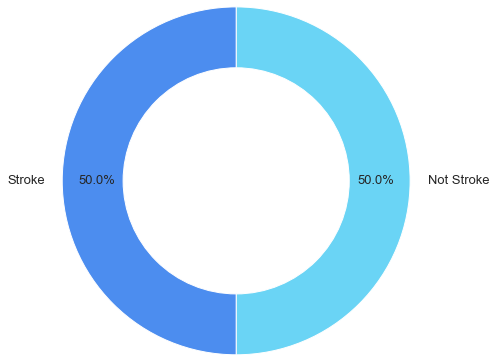

In [37]:

smote=SMOTE(sampling_strategy='minority')
x,y=smote.fit_resample(X,y)
stroke_count=y.value_counts()
plt.pie(stroke_count,labels=['Not Stroke','Stroke'],startangle=90,counterclock=False,wedgeprops = {'width' : 0.7},radius=2,autopct='%.1f%%',
        pctdistance=0.8,colors=['#6AD4F5','#4C8DEF'],textprops={'fontsize': 13})

In [38]:

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size = .2,random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7777, 22), (7777,), (1945, 22), (1945,))

# Feature Scaling

In [39]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# Machine Learning Modeling

# Knn without Grid Search

In [40]:

# Create simple model
baseline_model = KNeighborsClassifier()
baseline_model.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = baseline_model.predict(X_test)

In [42]:
# Simple model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,baseline_model.predict(X_train)))

baseline_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(baseline_report).transpose()
     

Testing-set Accuracy score is: 0.9604113110539846
Training-set Accuracy score is: 0.9728687154429728


,precision,recall,f1-score,support
No Stroke,0.950803,0.971282,0.960934,975.000000
Stroke,0.970495,0.949485,0.959875,970.000000
accuracy,0.960411,0.960411,0.960411,0.960411
macro avg,0.960649,0.960383,0.960404,1945.000000
weighted avg,0.960624,0.960411,0.960406,1945.000000


# Knn With Grid Search

In [43]:
# set hyperparameter
param_grid = {'n_neighbors': [1, 2],
              'p': [1, 2],
              'weights': ["uniform","distance"],
              'algorithm':["ball_tree", "kd_tree", "brute"],
              }

In [44]:
# Seek for the best hyperparameter with HalvingGridSearchCV
new_param = HalvingGridSearchCV(baseline_model, 
                                param_grid, 
                                cv=StratifiedKFold(n_splits=3, random_state= 123, shuffle=True),
                                resource='leaf_size',
                                max_resources=20,
                                scoring='recall',
                                aggressive_elimination=False).fit(X_train, y_train)

In [45]:
# Result of the hyperparameter tuning
print(f"Best Hyperparameter {new_param.best_estimator_} with score {new_param.best_score_}")

Best Hyperparameter KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance') with score 0.9586224620920073


In [46]:

# Set the model with the best hyperparameter
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1, weights='distance')
model.fit(X_train, y_train)
     

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=1, p=1,
                     weights='distance')

In [47]:
# Test tuned model with test data
y_pred = model.predict(X_test)

In [48]:
# Tuned model report
acc = accuracy_score(y_test, y_pred)
print('Testing-set Accuracy score is:', acc)
print('Training-set Accuracy score is:',accuracy_score(y_train,model.predict(X_train)))

improvement_report = classification_report(y_test, y_pred, output_dict=True, target_names=['No Stroke', 'Stroke'])
pd.DataFrame(improvement_report).transpose()

Testing-set Accuracy score is: 0.9516709511568123
Training-set Accuracy score is: 1.0


,precision,recall,f1-score,support
No Stroke,0.958377,0.944615,0.951446,975.000000
Stroke,0.945122,0.958763,0.951894,970.000000
accuracy,0.951671,0.951671,0.951671,0.951671
macro avg,0.951749,0.951689,0.951670,1945.000000
weighted avg,0.951766,0.951671,0.951669,1945.000000


<AxesSubplot:>

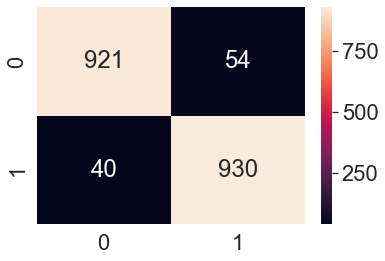

In [49]:
acc = confusion_matrix(y_test, y_pred)
sns.heatmap(acc, annot = True, fmt = "d")

# SVM without grid search

In [50]:
from sklearn.svm import SVC
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,y_pred))

  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


Accuracy Score 0.9516709511568123
[[921  54]
 [ 40 930]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       975
           1       1.00      0.91      0.95       970

    accuracy                           0.95      1945
   macro avg       0.96      0.95      0.95      1945
weighted avg       0.96      0.95      0.95      1945



# SVM with grid search

In [51]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.915 total time=   2.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.922 total time=   2.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.931 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.922 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   2.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.931 total time=   0.9s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.9s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.9s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.9s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.932 total time=   0.8s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.956 total time=   2.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.943 total time=   2.6s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.951 total time=   2.5s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.956 total time=   2.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.3s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.3s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.3s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.943 total time=   0.3s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.955 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.959 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.961 total time=   0.6s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [52]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [53]:
svc_grid_predictions = grid.predict(X_test)
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print(confusion_matrix(y_test,svc_grid_predictions))
print(classification_report(y_test,svc_grid_predictions))

Accuracy Score 0.9516709511568123
[[969   6]
 [ 77 893]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.99      0.92      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945



<AxesSubplot:>

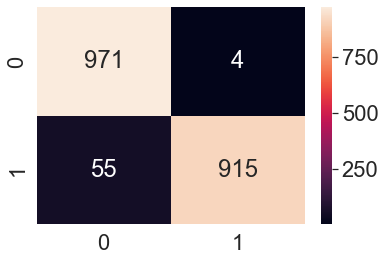

In [67]:
# Confussion matrix
best_random_grid = confusion_matrix(y_test, y_preds)
sns.heatmap(best_random_grid, annot = True, fmt = "d")

# Random-Forest without grid search

In [65]:
model=RandomForestClassifier()

model.fit(X_train, y_train)
      
y_preds = model.predict(X_test)

print(confusion_matrix(y_test,y_preds))
print("Accuracy Score {}".format(accuracy_score(y_test,y_preds)))
print("Classification report:\n {}".format(classification_report(y_test,y_preds)))

[[971   4]
 [ 55 915]]
Accuracy Score 0.9696658097686375
Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       1.00      0.94      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



<AxesSubplot:>

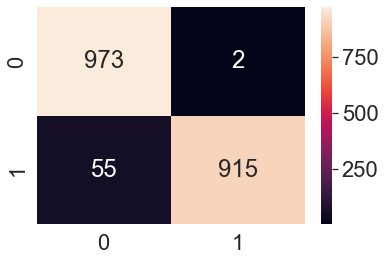

In [55]:
# Confussion matrix
best_random_grid = confusion_matrix(y_test, y_preds)
sns.heatmap(best_random_grid, annot = True, fmt = "d")

# Random Forest with grid search

In [56]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# linspace: Return evenly spaced numbers over a specified interval
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [57]:
rf=RandomForestClassifier()
# Randomized search on hyper parameters
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
# Controls the verbosity: the higher, the more messages
# Number of jobs to run in parallel
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [58]:
rf_randomcv.best_params_
# Parameter setting that gave the best results

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 450,
 'criterion': 'gini'}

In [59]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [60]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=450, max_features='log2', min_samples_split=5,
                       n_estimators=200)

In [61]:
best_random_grid=rf_randomcv.best_estimator_
# storing the best hyperparameters

In [64]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
# test with the obtained best hyperparameters
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report:\n {}".format(classification_report(y_test,y_pred)))

[[972   3]
 [ 57 913]]
Accuracy Score 0.9691516709511568
Classification report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       975
           1       1.00      0.94      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945



<AxesSubplot:>

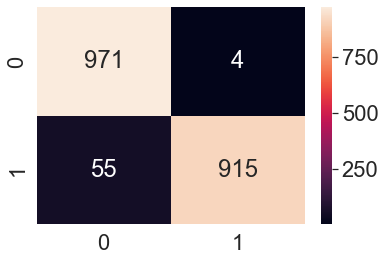

In [66]:
# Confussion matrix
best_random_grid = confusion_matrix(y_test, y_preds)
sns.heatmap(best_random_grid, annot = True, fmt = "d")

# LIME

In [63]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=x.columns,
    class_names=['0', '1'], # Check your class names in the CSV file. It should be 1, 2, 3, 4, 5 I think
    mode='classification'
)

exp = explainer.explain_instance(
    data_row=X_test[0],
    predict_fn=best_random_grid.predict_proba
)

exp.show_in_notebook(show_table=True)